In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer
import random
import numpy as np
from qiskit.result import marginal_counts

In [2]:
# Creating registers
def create_registers():
    alice_q = QuantumRegister(1, 'alice (q)')
    peter_alice_q = QuantumRegister(1, 'peter/alice (q)')
    peter_bob_q = QuantumRegister(1, 'peter/bob (q)')
    bob_c = ClassicalRegister(3, 'bob (c)')
    circ = QuantumCircuit(alice_q, peter_alice_q, peter_bob_q, bob_c)
    return circ

In [3]:
# randomly decide initial state of alice's qubit
def generate_amplitudes():
    alpha = np.sqrt(random.uniform(0, 1))
    beta = np.sqrt(1 - alpha ** 2)
    return alpha, beta

In [4]:
# Adds gates to registers
def add_gates(circ, alpha, beta):
    circ.initialize([alpha, beta], 0)
    circ.barrier()
    circ.h(1)
    circ.cnot(1, 2)
    circ.barrier()
    circ.cnot(0, 1)
    circ.h(0)
    circ.barrier()
    circ.measure(0, 0)
    circ.measure(1, 1)
    with circ.if_test((1, 1)):
        circ.x(2)
    with circ.if_test((0, 1)):
        circ.z(2)
    circ.measure(2, 2)
    return circ

c:\Users\param\WorkSpace\quantum-computing\experimenting_qiskit\env\lib\site-packages\qiskit\visualization\matplotlib.py:278: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  self._get_layer_widths()


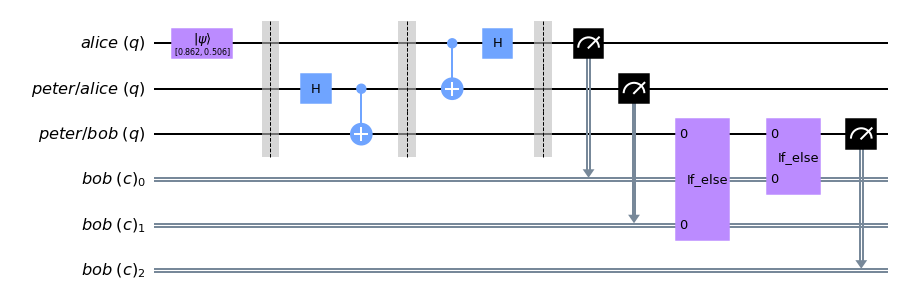

In [5]:
alpha, beta = generate_amplitudes()
circ = create_registers()
circ = add_gates(circ, alpha, beta)
display(circ.draw('mpl', cregbundle='False'))

In [6]:
device = Aer.get_backend("qasm_simulator")
shots = 1000
job = device.run(circ, shots=shots)
print(job.job_id())
result = job.result()
counts = result.get_counts(circ)
counts_m = marginal_counts(counts, [2])
number_of_0s = counts_m.get('0')
number_of_1s = counts_m.get('1')
alpha = np.sqrt(number_of_0s / shots)
beta = np.sqrt(number_of_1s / shots)
print("|\u03C8\u27E9 ({:.4f}, {:.4f})".format(alpha, beta))




bcd7cacd-386b-4a20-a9b3-9a8cfcfdecac
|ψ⟩ (0.8689, 0.4950)
